The United States Bureau of Labor Statistics (BLS) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. While unemployment rate isn't perfect, it's a commonly used proxy for the health of the economy. 

The dataset we'll be working with is a time series dataset, which means the data points (monthly unemployment rates) are ordered by time. Here's a preview of the dataset:

DATE	VALUE
1948-01-01	3.4
1948-02-01	3.8
1948-03-01	4.0
1948-04-01	3.9
1948-05-01	3.5


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

unrate = pd.read_csv(r'C:\Users\CLEMO\Downloads\unrate.csv')

unrate['DATE'] = pd.to_datetime(unrate['DATE'])

unrate.iloc[12, :]


DATE     1949-01-01 00:00:00
VALUE                    4.3
Name: 12, dtype: object

    The VALUE column contains a series of dates in string.We need to convert this column to the datetime type using the pandas.to_datetime() function, which returns a Series object with the datetime data type that we can assign back to the DataFrame:

In [2]:
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate['DATE'].describe

<bound method NDFrame.describe of 0     1948-01-01
1     1948-02-01
2     1948-03-01
3     1948-04-01
4     1948-05-01
5     1948-06-01
6     1948-07-01
7     1948-08-01
8     1948-09-01
9     1948-10-01
10    1948-11-01
11    1948-12-01
12    1949-01-01
13    1949-02-01
14    1949-03-01
15    1949-04-01
16    1949-05-01
17    1949-06-01
18    1949-07-01
19    1949-08-01
20    1949-09-01
21    1949-10-01
22    1949-11-01
23    1949-12-01
24    1950-01-01
25    1950-02-01
26    1950-03-01
27    1950-04-01
28    1950-05-01
29    1950-06-01
         ...    
794   2014-03-01
795   2014-04-01
796   2014-05-01
797   2014-06-01
798   2014-07-01
799   2014-08-01
800   2014-09-01
801   2014-10-01
802   2014-11-01
803   2014-12-01
804   2015-01-01
805   2015-02-01
806   2015-03-01
807   2015-04-01
808   2015-05-01
809   2015-06-01
810   2015-07-01
811   2015-08-01
812   2015-09-01
813   2015-10-01
814   2015-11-01
815   2015-12-01
816   2016-01-01
817   2016-02-01
818   2016-03-01
819   2016-04-

In order to get more insight into the data we need to plot it on a graph.

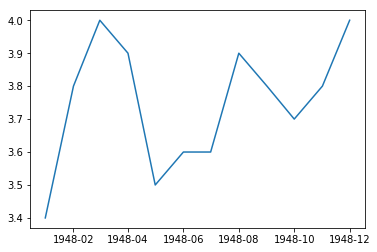

In [3]:
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])

The x-axis is too close together sowe will need to rotate them 90 degrees.

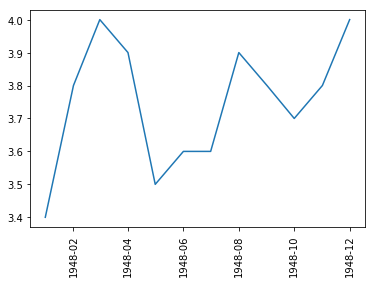

In [4]:
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation = 90)
plt.show()
%matplotlib inline

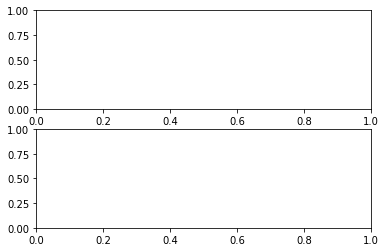

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

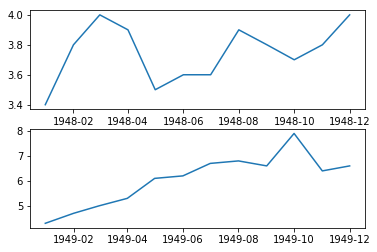

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

x1_values = unrate[0:12]['DATE']
y1_values = unrate[0:12]['VALUE']

ax1.plot(x1_values, y1_values)

x2_values = unrate[12:24]['DATE']
y2_values = unrate[12:24]['VALUE']

ax2.plot(x2_values, y2_values)


plt.show()



A figure is a container for our graphs. We will create one and set it to width = 12 and height= 5.
In the figure we'll plot both the unemployment levels for 1948 on the first one and 1949 for the second one.


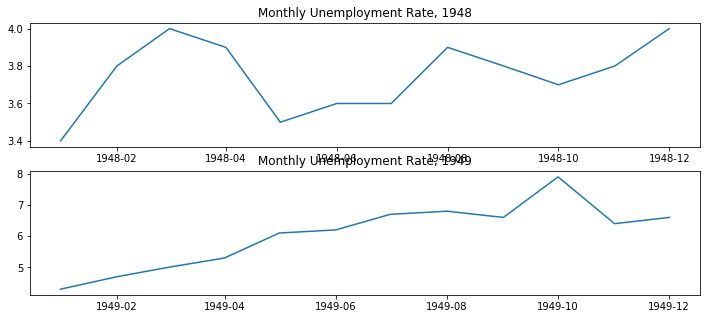

In [7]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

I'll make changes to the width and height both be equal to 12. And create a figure with 5 columns and 1 row.

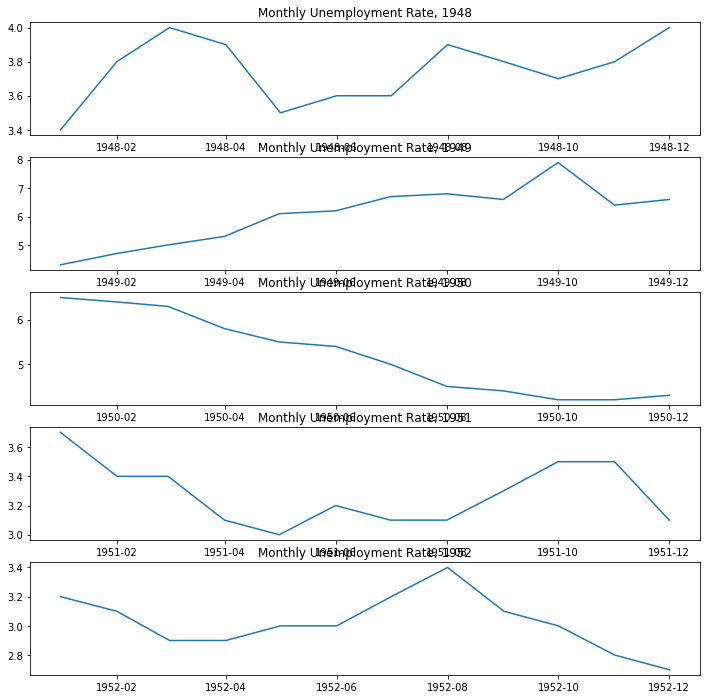

In [8]:
fig = plt.figure(figsize = (12, 12))

ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')

ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')

ax3.plot(unrate[24:36]['DATE'], unrate[24:36]['VALUE'])
ax3.set_title('Monthly Unemployment Rate, 1950')

ax4.plot(unrate[36:48]['DATE'], unrate[36:48]['VALUE'])
ax4.set_title('Monthly Unemployment Rate, 1951')

ax5.plot(unrate[48:60]['DATE'], unrate[48:60]['VALUE'])
ax5.set_title('Monthly Unemployment Rate, 1952')

plt.show()

I've added a a dictionary for the title for each plot, and increased the figure size to 16 by 16 inches.

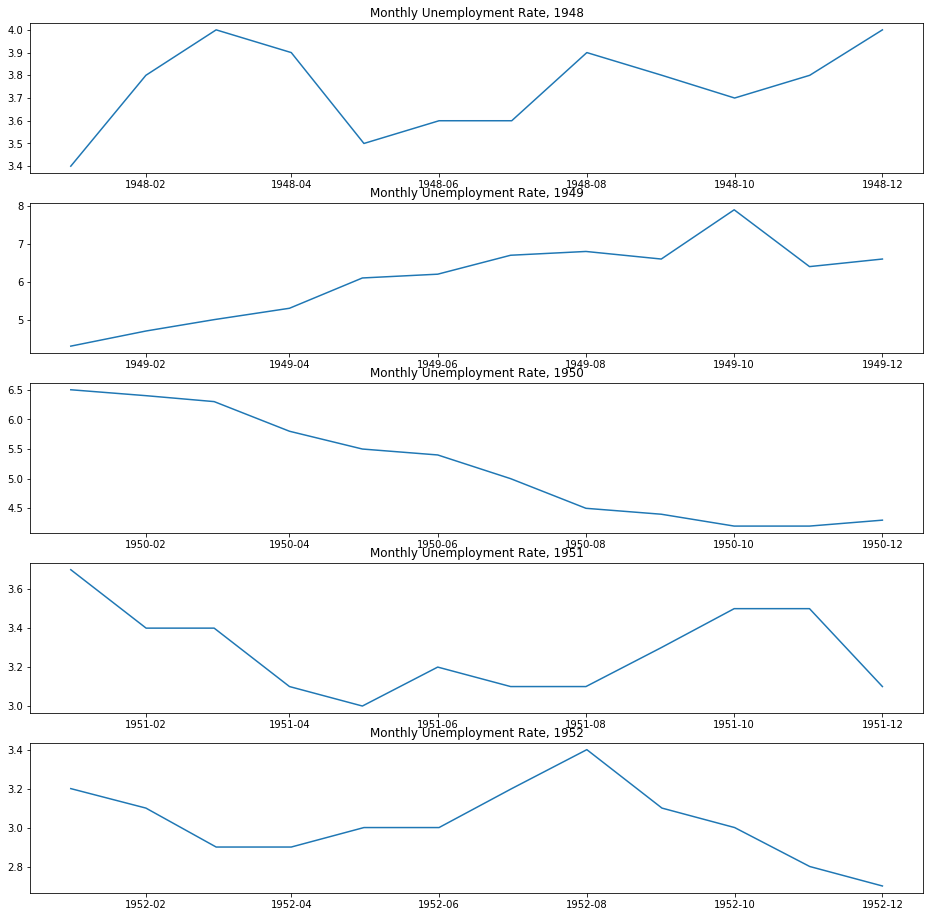

In [9]:
#An alternative to the above method using for loop
fig = plt.figure(figsize = (16, 16))

emp_title = {0:"Monthly Unemployment Rate, 1948",
             1:"Monthly Unemployment Rate, 1949",
             2:"Monthly Unemployment Rate, 1950",
             3:"Monthly Unemployment Rate, 1951",
             4:"Monthly Unemployment Rate, 1952"
            }
for i in range(5):
    ax = fig.add_subplot(5,1, i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])
    ax.set_title(emp_title[i])

plt.show()

In [10]:
#It is an accessor that calls pandas.Series.dt.month and returns a series  
#containing the integer values for each month. 1 for January.
unrate['MONTH'] = unrate['DATE'].dt.month

Now we compare the rate of employment of two years in the same chart plot, with red for 1948 and blue for 1949. We'll also add a label at the top for the colours.

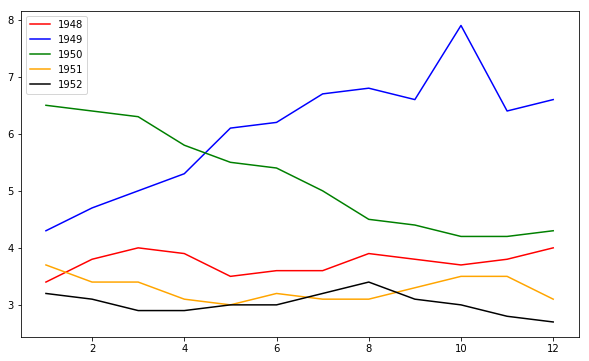

In [13]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label = str(1948 + i))
    
plt.legend(loc = 'upper left')
plt.show()